# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [49]:
print(str(df['YEAR'].max() - df['YEAR'].min()) + " years of data")

33 years of data


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [46]:
michigan_data = df[df['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean()
ohio_data = df[df['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean()
if michigan_data > ohio_data:
    print("Michigan has a higher average of " + str(michigan_data) + " compared to Ohio's " + str(ohio_data))
elif ohio_data > michigan_data:
    print("Ohio has a higher average of " + str(ohio_data) + " compared to Michigan's " + str(michigan_data))

Ohio has a higher average of 223.1818181818182 compared to Michigan's 217.83333333333334


Find the average for your chosen test across all states in 2019

In [29]:
df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()

219.79245283018867

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [36]:
df.groupby(df['STATE'])['AVG_READING_4_SCORE'].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [75]:
df['TOTAL_REVENUE_TO_ENROLL_4'] = df['TOTAL_REVENUE'] / df['ENROLL_4']
df.dropna(subset=['TOTAL_REVENUE_TO_ENROLL_4'], inplace=True)
df.groupby(['STATE'])['TOTAL_REVENUE_TO_ENROLL_4'].mean()


STATE
ALABAMA                  96.598652
ALASKA                  172.252112
ARIZONA                  85.512463
ARKANSAS                101.266932
CALIFORNIA              119.026848
COLORADO                107.295592
CONNECTICUT             180.147790
DELAWARE                144.923393
DISTRICT_OF_COLUMBIA    193.386693
FLORIDA                 107.660406
GEORGIA                 110.170561
HAWAII                  138.216550
IDAHO                    81.928854
ILLINOIS                139.800056
INDIANA                 126.682589
IOWA                    131.472772
KANSAS                  121.220087
KENTUCKY                106.648676
LOUISIANA               104.573857
MAINE                   145.813089
MARYLAND                152.038924
MASSACHUSETTS           163.936839
MICHIGAN                140.261910
MINNESOTA               136.913358
MISSISSIPPI              88.727575
MISSOURI                113.461757
MONTANA                 115.940482
NEBRASKA                131.711241
NEVADA        

Feature engineering justification: Comparing states' total revenue with their 4th grade enrollment numbers might be able to show patterns in their use of and the availability of financial resources (or lack thereof) to provide adequate education to their students. This can potentially be verified when comparing these ratios to states' average reading scores for the 4th grade.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '4th Grade Reading Score Range Over Time')

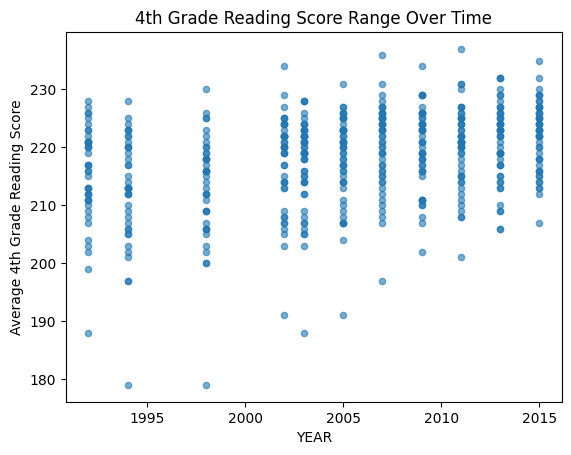

In [234]:
df.plot.scatter(x='YEAR', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('YEAR')
plt.ylabel('Average 4th Grade Reading Score')
plt.title('4th Grade Reading Score Range Over Time')

4th Grade Reading Score Range Over Time: The scores over time have had, on average, their mean, max, and min values all go up, indicating an overall stronger educational curriculum resulting in better performing students.

**Visualization 2**

Text(0.5, 1.0, 'Average Reading Scores Between 4th and 8th Grades')

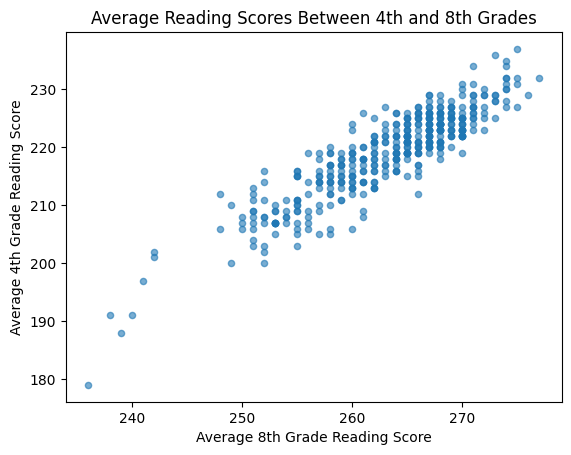

In [151]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Average 8th Grade Reading Score')
plt.ylabel('Average 4th Grade Reading Score')
plt.title('Average Reading Scores Between 4th and 8th Grades')

Average Reading Scores Between 4th and 8th Grades: The reading scores between 4th and 8th grade have strong correlations with one another. The lower a state's 4th grade reading scores are, the lower the state's 8th grade reading scores are as well, and vice versa.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X = df[['ENROLL_4','YEAR','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']
y.fillna(y.median(), inplace=True)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=45)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
model = LinearRegression()

In [228]:
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [230]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

-357.6028035405524
[2.39430573e-06 1.54980741e-01 1.00824233e+00]


0.8059823635897851

In [231]:
np.mean(model.predict(X_test)-y_test)

0.010942142828781915

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

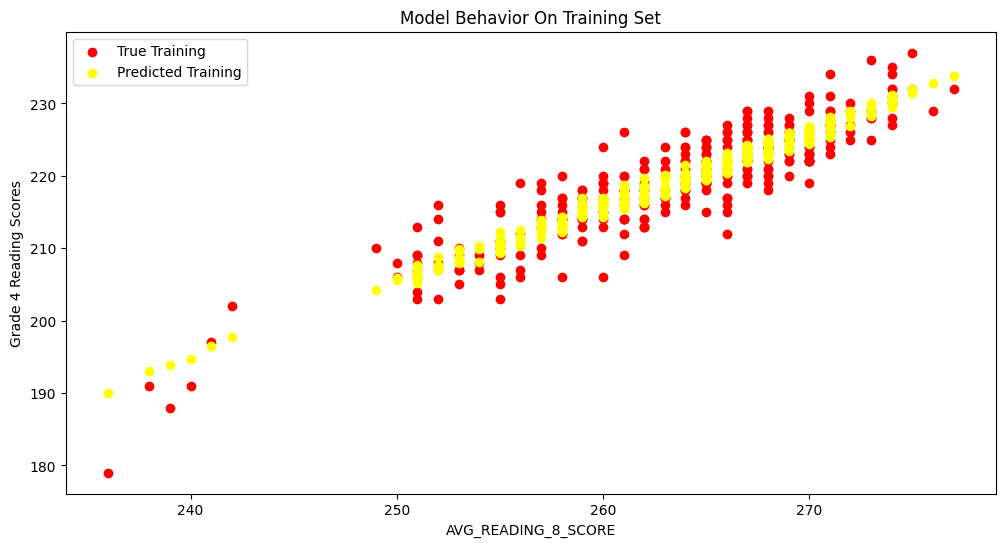

In [232]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "yellow")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

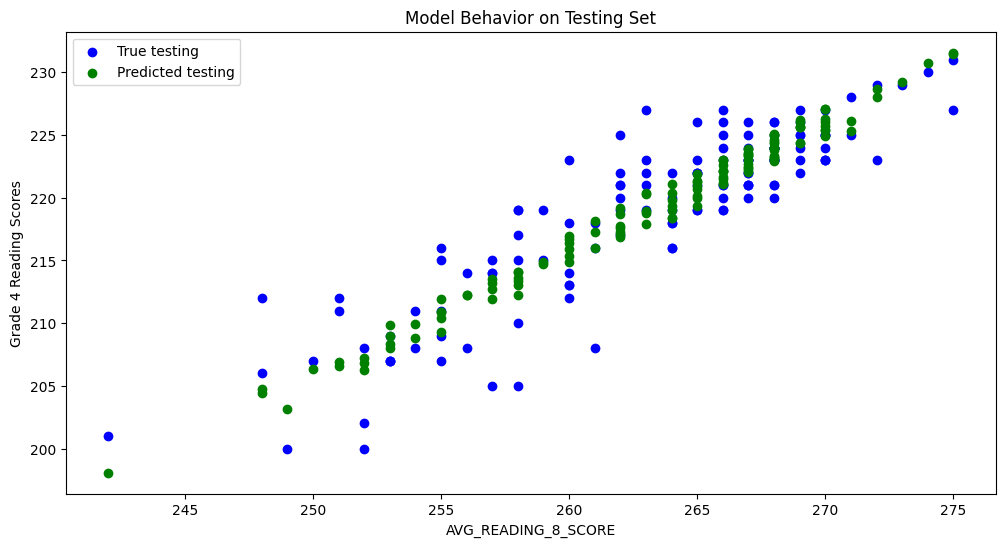

In [233]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In this project, I conducted a thorough analysis of the states_edu dataset and employed various machine learning techniques to develop a predictive model. The main goal was to understand the factors influencing the 4th grade reading scores and create a model capable of making accurate predictions. I trained a machine learning model using the training set, leveraging linear regression. The findings revealed variables influencing reading scores, such as the year and total state revenue. The model demonstrated promising performance during the training and testing sets, doing a pretty decent job at its generalization and predictions.

Student performance can be predicted by implementing a model utilizing several different variables related to student scores. These variables include total state revenue, total state expenditure, state enrollment numbers, and the correlation between previous and current academic performances. 